In [1]:
#Sentiment analysis of IMDB datset with Keras and TensorFlow
#Goal: Comparison of three methods for text encoding:
#1- Default Keras (Word Indexing)
#2 - One hot encoding
#3 - Word embedding

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#1 - Default
# Load IMDb dataset
max_words=10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#1 - Default
#Prepare data for training
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [4]:
#1 - Default
#Create ANN
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #у нас бинарная класификация, поэтому один нейрон

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#1 - Default
#Train ANN
history = model.fit(x_train,
                    y_train,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5008 - loss: 210.2119 - val_accuracy: 0.5036 - val_loss: 38.2855
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5251 - loss: 21.9943 - val_accuracy: 0.5116 - val_loss: 2.0769
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5108 - loss: 1.4772 - val_accuracy: 0.5180 - val_loss: 0.8932
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5109 - loss: 0.9030 - val_accuracy: 0.5148 - val_loss: 0.9113
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5085 - loss: 0.8054 - val_accuracy: 0.4992 - val_loss: 0.7854
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5096 - loss: 0.7453 - val_accuracy: 0.4932 - val_loss: 0.8060
Epoch 7/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5079 - loss: 0.7264 - val_accuracy: 0.5160 - val_loss: 0.8017
Epoch 8/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5181 - loss: 0.7199 - val_accuracy

In [6]:
#1 - Default
#save history
train_accuracy_def = history.history['accuracy']
val_accuracy_def = history.history['val_accuracy']

#evaluate for test dataset
scores = model.evaluate(x_test, y_test, verbose=1)
test_accuracy_def = round(scores[1] * 100, 4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4945 - loss: 0.8299


In [7]:
#2 - One hot encoding
# Load IMDb dataset
max_words=10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)


In [8]:
#2 - One hot encoding
#Prepare data for training

#Function for vectorization
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#vectorization of datasets
x_train = vectorize_sequences(x_train, max_words)
x_test = vectorize_sequences(x_test, max_words)

In [9]:
#2 - One hot encoding
#Create ANN
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
#2 - One hot encoding
#Train ANN
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.8099 - loss: 0.4157 - val_accuracy: 0.8840 - val_loss: 0.2794
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9446 - loss: 0.1541 - val_accuracy: 0.8808 - val_loss: 0.2971
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9752 - loss: 0.0756 - val_accuracy: 0.8776 - val_loss: 0.3707
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9921 - loss: 0.0287 - val_accuracy: 0.8800 - val_loss: 0.5049
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9985 - loss: 0.0073 - val_accuracy: 0.8816 - val_loss: 0.6502
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.8816 - val_loss: 0.7452
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 1.0000 - loss: 3.7216e-04 - val_accuracy: 0.8832 - val_loss: 0.8009
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 1.0000 - loss: 2.0565e-04 -

In [11]:
#2 - One hot encoding
#save history
train_accuracy_ohe = history.history['accuracy']
val_accuracy_ohe = history.history['val_accuracy']

#evaluate for test dataset
scores = model.evaluate(x_test, y_test, verbose=1)
test_accuracy_ohe = round(scores[1] * 100, 4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8653 - loss: 0.9428


In [12]:
#3 - Embedding
# Load IMDb dataset
max_words=10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [13]:
#3 - Embedding
#Prepare data for training
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [14]:
#3 - Embedding
#Create ANN
model = Sequential()
model.add(Embedding(max_words, 50, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
#3 - Embedding
#Train ANN
history = model.fit(x_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5795 - loss: 0.6697 - val_accuracy: 0.8300 - val_loss: 0.4207
Epoch 2/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8630 - loss: 0.3414 - val_accuracy: 0.8412 - val_loss: 0.3550
Epoch 3/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9220 - loss: 0.2171 - val_accuracy: 0.8708 - val_loss: 0.3070
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9571 - loss: 0.1467 - val_accuracy: 0.8852 - val_loss: 0.2957
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9749 - loss: 0.1020 - val_accuracy: 0.8812 - val_loss: 0.3058
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9898 - loss: 0.0643 - val_accuracy: 0.8732 - val_loss: 0.3242
Epoch 7/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9943 - loss: 0.0450 - val_accuracy: 0.8656 - val_loss: 0.3513
Epoch 8/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9978 - loss: 0.0296 - val_accu

In [16]:
#3 - Embedding
#save history
train_accuracy_emb = history.history['accuracy']
val_accuracy_emb = history.history['val_accuracy']

#evaluate for test dataset
scores = model.evaluate(x_test, y_test, verbose=1)
test_accuracy_emb = round(scores[1] * 100, 4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8623 - loss: 0.4217


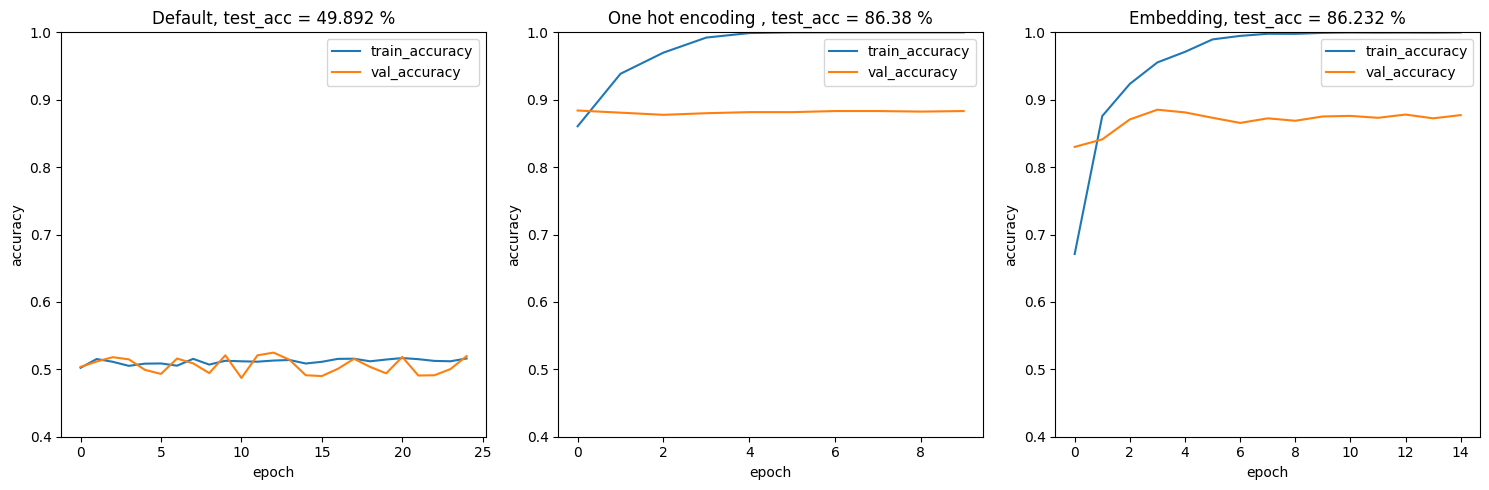

In [17]:
#Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(train_accuracy_def, label='train_accuracy')
axes[0].plot(val_accuracy_def, label='val_accuracy')
axes[0].set_title(f"Default, test_acc = {test_accuracy_def} %")
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')
axes[0].set_ylim(0.4, 1)
axes[0].legend()

axes[1].plot(train_accuracy_ohe, label='train_accuracy')
axes[1].plot(val_accuracy_ohe, label='val_accuracy')
axes[1].set_title(f"One hot encoding , test_acc = {test_accuracy_ohe} %")
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
axes[1].set_ylim(0.4, 1)
axes[1].legend()

axes[2].plot(train_accuracy_emb, label='train_accuracy')
axes[2].plot(val_accuracy_emb, label='val_accuracy')
axes[2].set_title(f"Embedding, test_acc = {test_accuracy_emb} %")
axes[2].set_xlabel('epoch')
axes[2].set_ylabel('accuracy')
axes[2].set_ylim(0.4, 1)
axes[2].legend()


plt.tight_layout()
plt.show()